# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# load data
start_wall_time=time.time()
start_runtime=time.process_time()
df = pd.read_csv(R'C:\Users\nikhi\Downloads\data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# Split the data into training and testing sets
np.random.seed(0)
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
train_df = train_df.drop(["Unnamed: 32"], axis=1)
test_df = test_df.drop(["Unnamed: 32"], axis=1)


The feature and target variables are being separated for training and testing data, with the "id" and "diagnosis" columns being dropped from the feature variables as they are not needed for the model.

In [6]:
# Separate the features and target variable for training and testing data
X_train= train_df.drop(["id", "diagnosis"], axis=1)
y_train= train_df["diagnosis"]
X_test = test_df.drop(["id", "diagnosis"], axis=1)
y_test = test_df["diagnosis"]

In [7]:
# converting the categorical variable to a numeric representation using a simple mapping
y_train = np.where(y_train == 'M', 1, -1)
y_test = np.where(y_test == 'M', 1, -1)

In [8]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115


In [9]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115


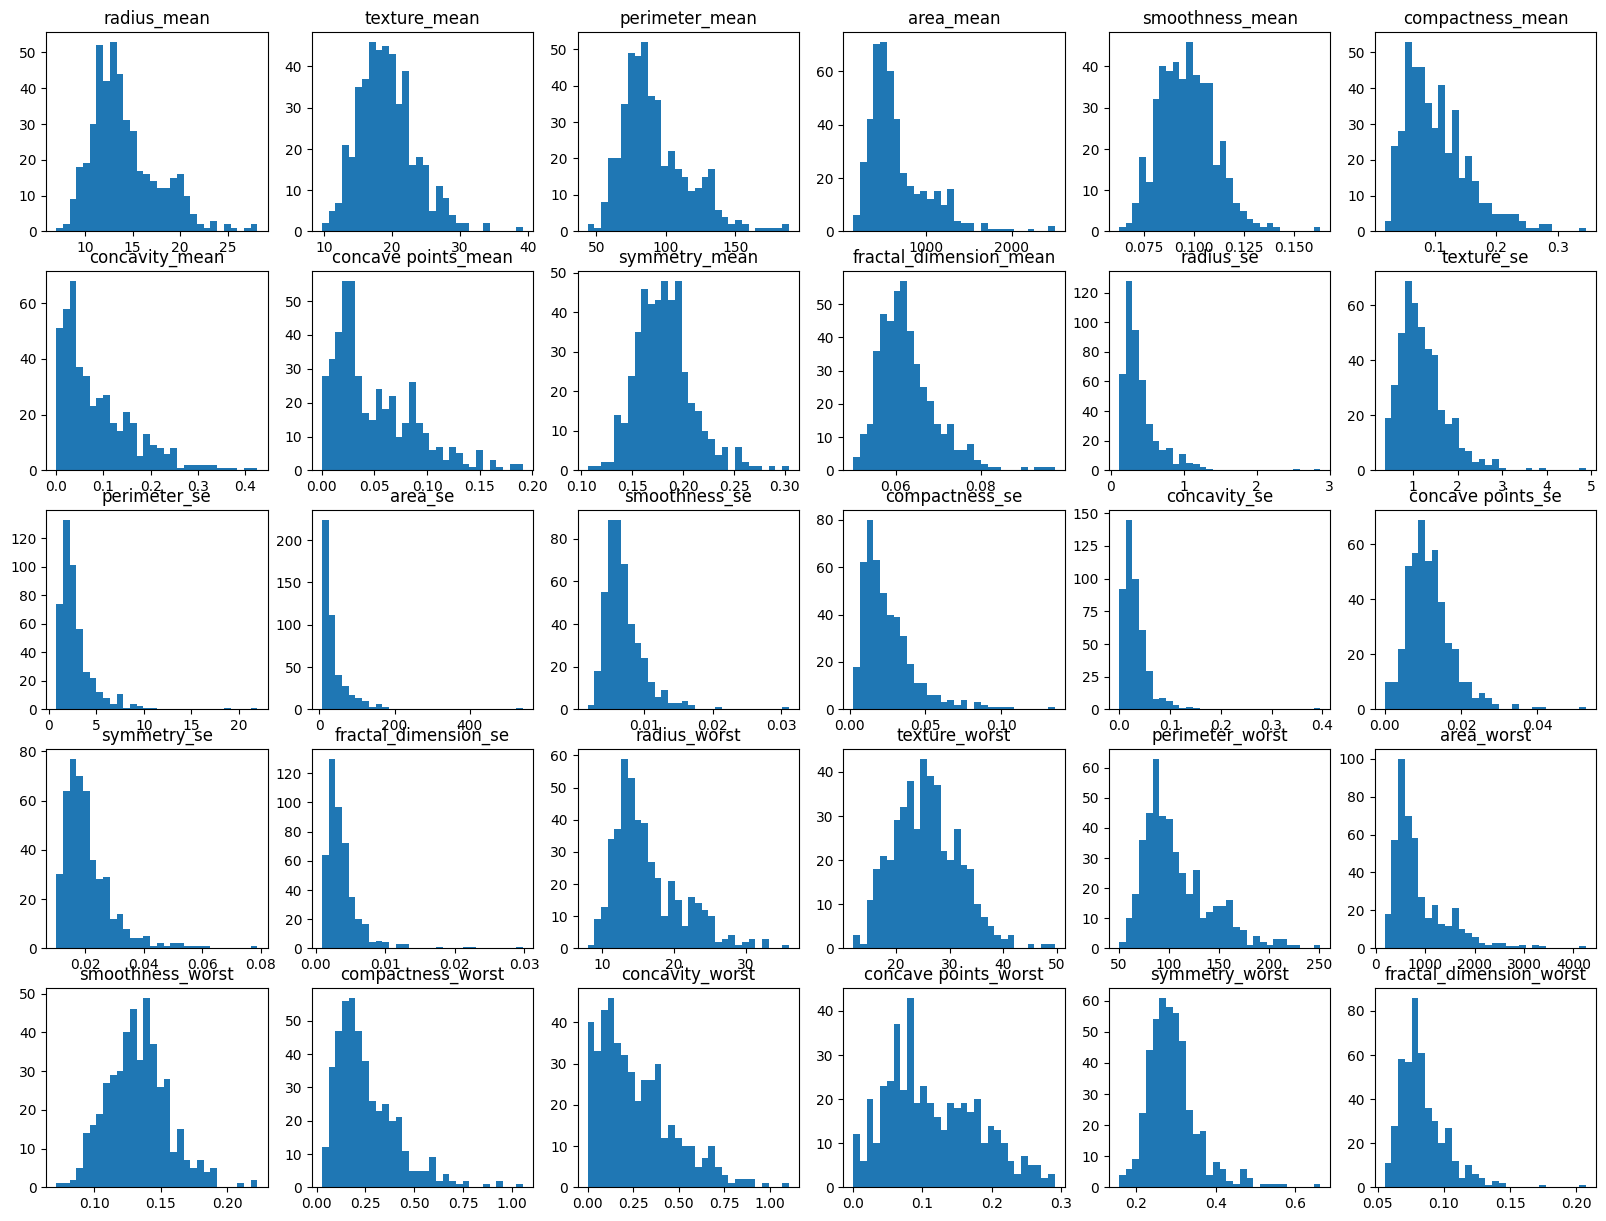

In [10]:
# Plot histograms for all features
plt.figure(figsize=(20,15))
for i, feature in enumerate(X_train.columns):
    plt.subplot(5, 6, i+1)
    plt.hist(X_train[feature], bins=30)
    plt.title(feature)
plt.show()

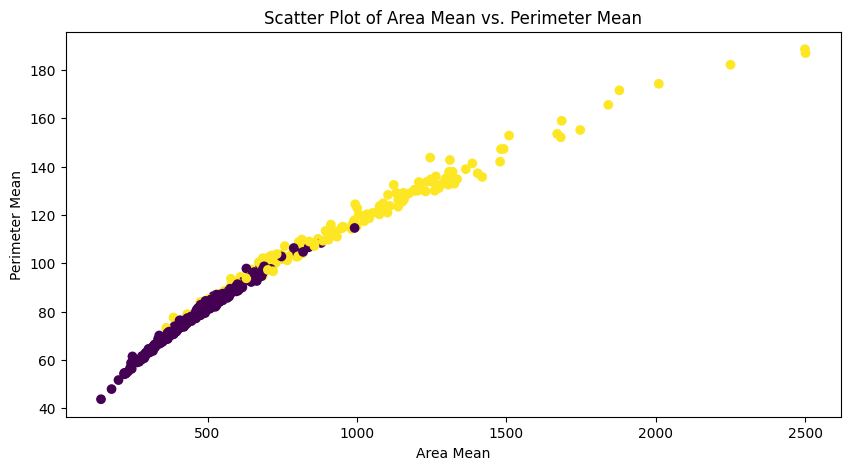

In [11]:
# Plot scatter plots for two features
plt.figure(figsize=(10,5))
plt.scatter(X_train['area_mean'], X_train['perimeter_mean'], c=y_train)
plt.xlabel('Area Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot of Area Mean vs. Perimeter Mean')
plt.show()

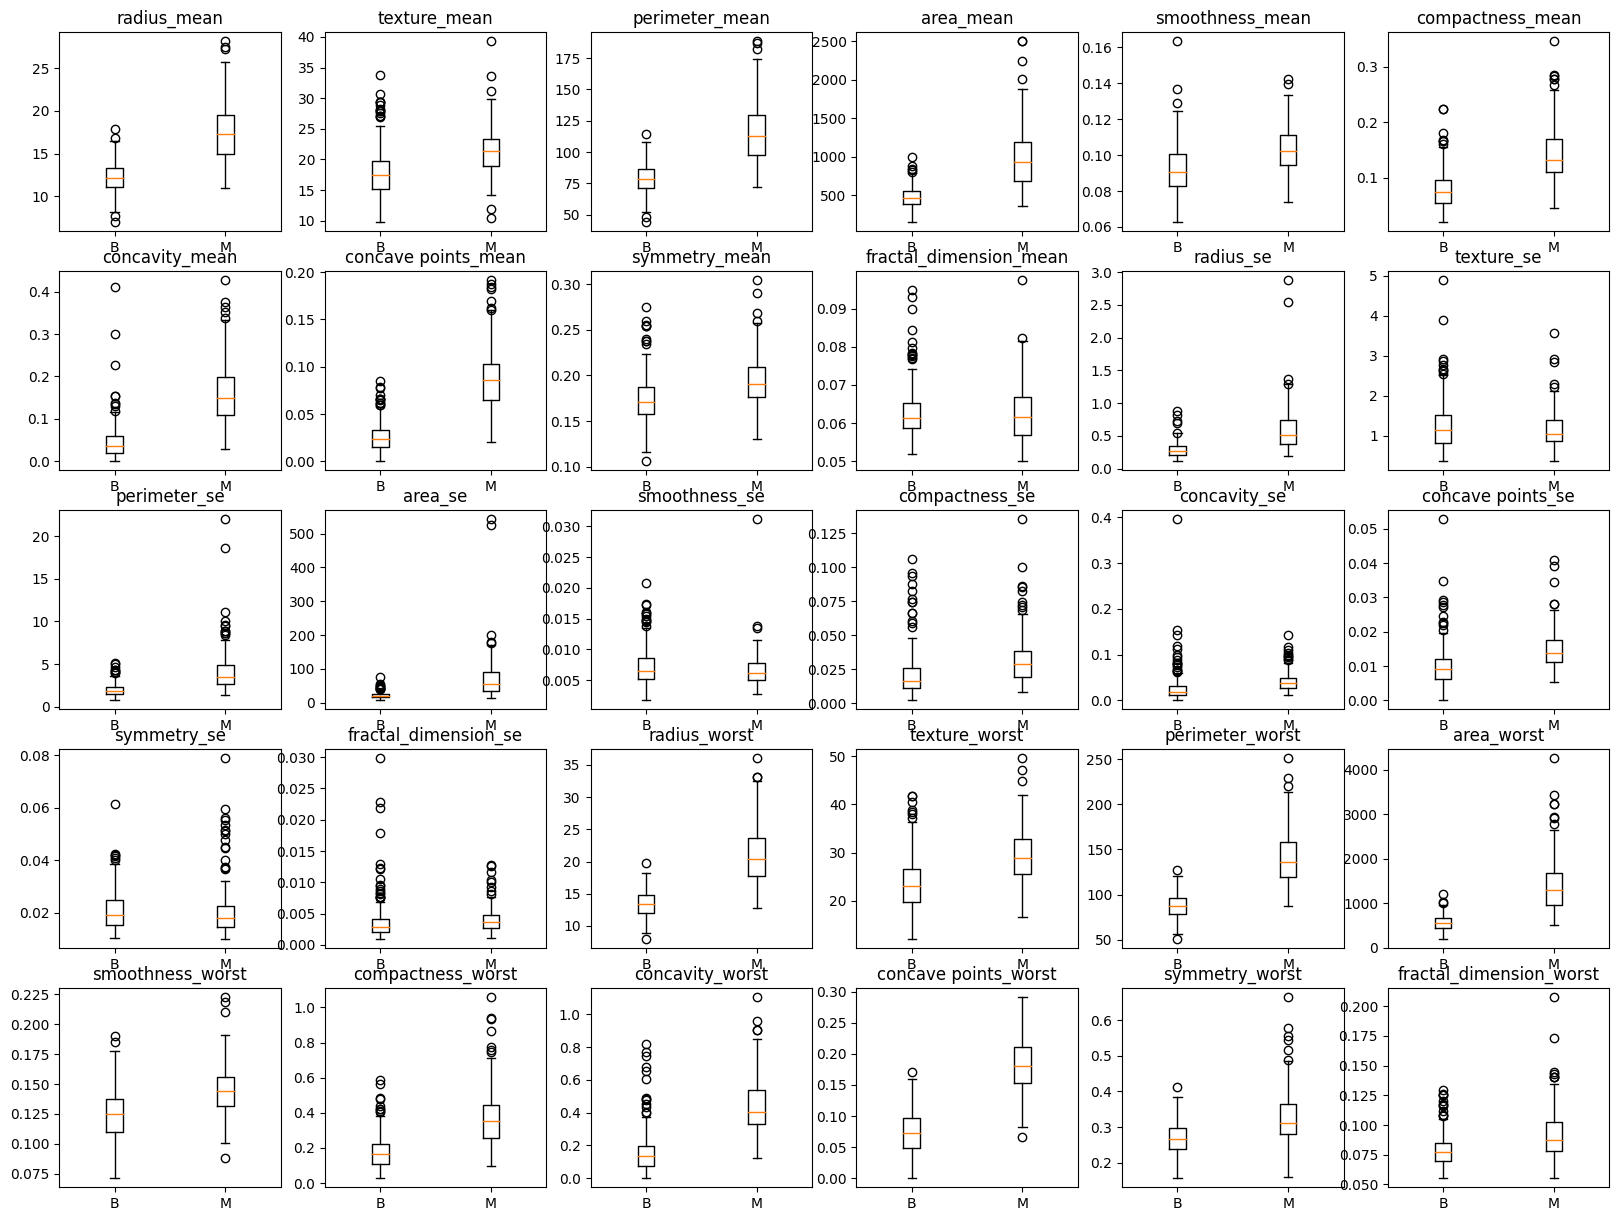

In [12]:
# Plot box plots for all features by diagnosis
plt.figure(figsize=(20,15))
for i, feature in enumerate(X_train.columns):
    plt.subplot(5, 6, i+1)
    plt.boxplot([X_train[feature][y_train==-1], X_train[feature][y_train==1]], labels=['B', 'M'])
    plt.title(feature)
plt.show()

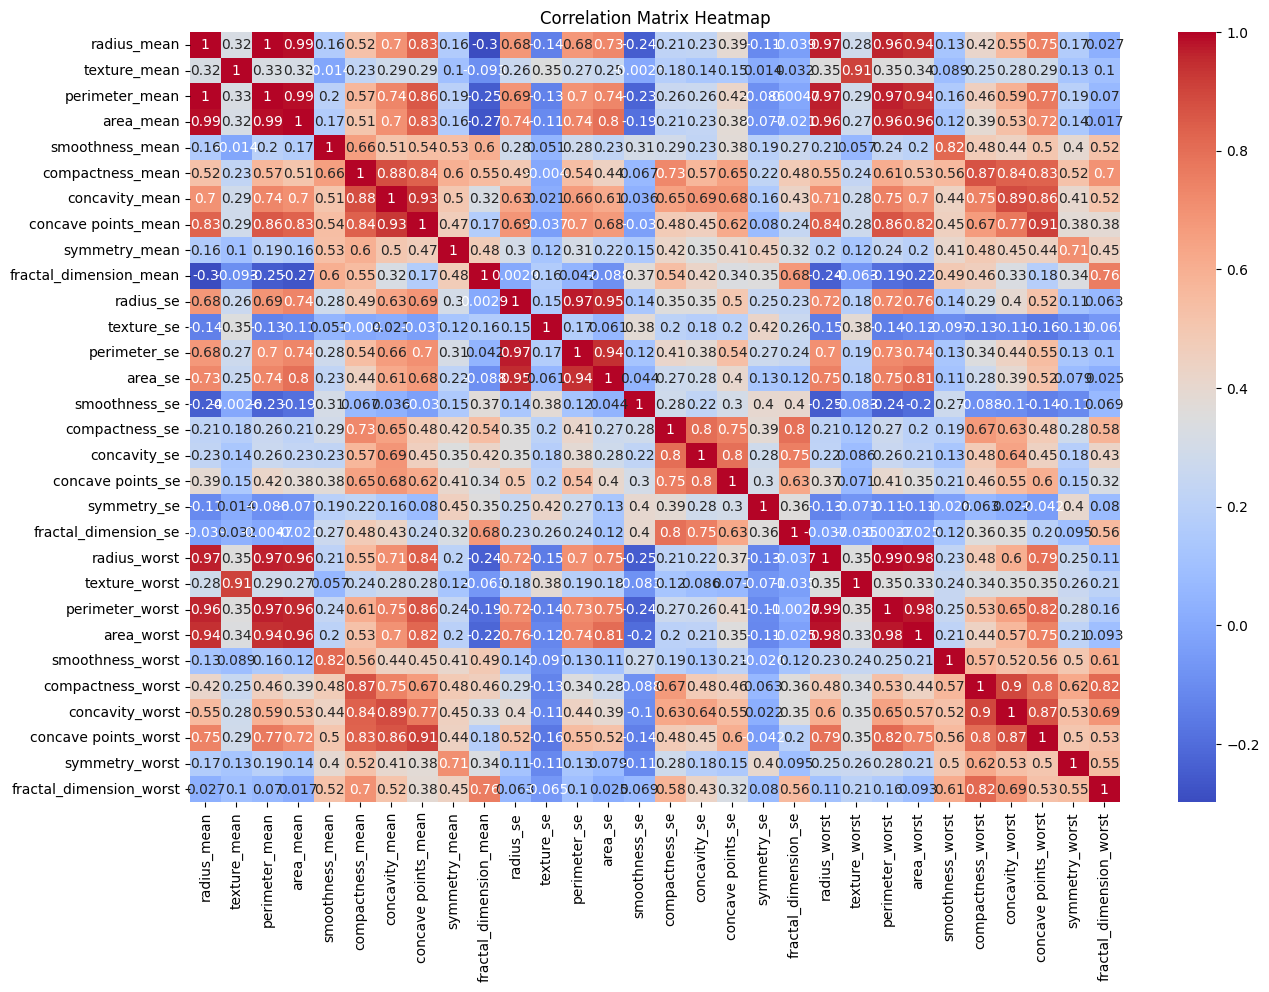

In [13]:
# Plot heatmap of correlation matrix
corr_matrix = X_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.840,27.66,112.00,876.5,0.11310,0.19240,0.2322,0.1119,0.2809,0.06287
17,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.960,31.48,136.80,1315.0,0.17890,0.42330,0.4784,0.2073,0.3706,0.11420
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.1288,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
test_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720
13,846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.840,27.66,112.00,876.5,0.11310,0.19240,0.2322,0.1119,0.2809,0.06287
17,84862001,M,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,...,20.960,31.48,136.80,1315.0,0.17890,0.42330,0.4784,0.2073,0.3706,0.11420
19,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.1288,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y_train,y_test

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
         1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
        -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
         1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
        -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
        -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
        -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
         1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,
        -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        -1, 

Feature Scaling: I have scaled the dataset by subtracting the mean and dividing by the standard deviation to ensure that all features have a similar scale and distribution, which can help the algorithm converge faster and more reliably.

In [17]:
# Normalizing the data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [18]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.083460,-2.104601,1.255317,0.963819,1.569574,3.320797,2.687894,2.519263,2.211887,2.343891,...,1.872396,-1.374812,2.279373,1.981626,1.292195,2.594447,2.167550,2.249813,2.616300,1.970250
1,1.817227,-0.351784,1.671426,1.881084,-0.850788,-0.492051,-0.020160,0.536082,-0.000072,-0.882529,...,1.791563,-0.374421,1.513301,1.871285,-0.384973,-0.426095,-0.134911,1.058378,-0.260981,0.292340
2,1.566950,0.473630,1.551949,1.533935,0.936799,1.065207,1.383405,2.024305,0.936458,-0.396517,...,1.497248,-0.025600,1.326237,1.438681,0.514758,1.074087,0.887317,1.913690,1.080507,0.211477
3,-0.785087,0.267276,-0.607696,-0.771646,3.302513,3.441529,1.942290,1.439121,2.860534,5.085763,...,-0.297660,0.134001,-0.266184,-0.560233,3.371185,3.860048,2.045157,2.131270,5.782708,5.008232
4,1.737593,-1.165338,1.762064,1.799236,0.268072,0.545865,1.391026,1.415920,-0.011004,-0.566328,...,1.283766,-1.483407,1.317329,1.203988,0.209024,-0.310066,0.640572,0.705749,-0.860997,-0.394996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.116480,0.812808,0.167255,-0.006788,-0.851507,0.549698,0.183071,-0.309728,-1.304654,-0.179861,...,-0.179519,0.260696,-0.057444,-0.269845,-1.310909,0.396829,0.475097,-0.074536,-1.025768,-0.211931
560,-0.037099,1.873038,-0.039152,-0.166815,0.195447,0.158755,-0.557198,-0.163303,-1.002195,-0.144727,...,-0.216827,1.231470,-0.226692,-0.316783,-0.371870,-0.175119,-0.668545,-0.160067,-1.038204,-0.033920
561,-0.847656,2.399595,-0.892380,-0.771928,-1.587827,-1.317248,-1.123958,-1.272832,-2.740423,-1.124072,...,-0.917380,2.075550,-0.969307,-0.784591,-1.744614,-1.256334,-1.317719,-1.732642,-2.101445,-1.390623
564,2.098788,0.744024,2.046336,2.312904,1.037468,0.221996,1.974045,2.307875,-0.313463,-0.946941,...,1.886904,0.117548,1.730058,1.995637,0.366259,-0.270338,0.692957,1.592573,-1.333549,-0.711148


In [19]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115


In [20]:

# Define the SVM class
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient descent
        for i in range(self.num_iterations):
            # SVM loss function
            y_pred = np.dot(X, self.w) - self.b
            error = 1 - y * y_pred
            error[error < 0] = 0
            cost = self.lambda_param * np.dot(self.w, self.w) + np.mean(error)
            
            # Calculate gradients
            dw = np.zeros(n_features)
            for j in range(n_samples):
                if error[j] > 0:
                    dw += self.lambda_param * self.w - y[j] * X[j]
            dw /= n_samples
            db = -np.mean(y * error)
            
            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
    
    def predict(self, X):
        y_pred = np.dot(X, self.w) - self.b
        return np.sign(y_pred)
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [22]:
print(X_train.dtype)
print(y_train.dtype)

float64
int32


In [23]:

# Train the model
svm = SVM()
svm.fit(X_train, y_train)


end_wall_time=time.time()
end_runtime=time.process_time()
print(f"Wall clock time  is {end_wall_time-start_wall_time} seconds")
print(f"Run time is {end_runtime-start_runtime} seconds")

Wall clock time  is 7.1836090087890625 seconds
Run time is 3.96875 seconds


In [24]:
# Test the model
accuracy_train = svm.accuracy(X_train, y_train)
accuracy_test = svm.accuracy(X_test, y_test)
print('Accuracy on training set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)


Accuracy on training set: 0.9694323144104804
Accuracy on test set: 0.954954954954955


In [25]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate confusion matrix
conf_mat = np.zeros((2, 2))
for i in range(len(y_test)):
    if y_test[i] == 1:
        if y_pred[i] == 1:
            conf_mat[0][0] += 1
        else:
            conf_mat[0][1] += 1
    else:
        if y_pred[i] == 1:
            conf_mat[1][0] += 1
        else:
            conf_mat[1][1] += 1

# Calculate precision, recall, and f1-score
precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0])
recall = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])
f1_score = 2 * precision * recall / (precision + recall)

# Print results
print('Confusion matrix:\n', conf_mat)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)


Confusion matrix:
 [[34.  2.]
 [ 3. 72.]]
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1-score: 0.9315068493150684
